In [96]:
import pandas as pd
import numpy as np
import datetime as dt



In [97]:
df=pd.read_csv('Data1.csv')

In [98]:
fd=df[df['OFFRNG_ID']==190]

In [99]:
#df2 = fd.groupby(['DATE'],as_index=False).agg({'NO_OF_OPRTNTY_CREATD': 'sum','NO_OF_WINS': 'sum'})
df2 = fd.groupby(['DATE'],as_index=False).agg({'NO_OF_OPRTNTY_CREATD': 'sum'})

In [100]:
df2=df2.sort_values(by='DATE')

In [101]:
df2

,DATE,NO_OF_OPRTNTY_CREATD
0,2016-12-31,0
1,2017-01-02,2
2,2017-01-03,1
3,2017-01-04,2
4,2017-01-05,4
5,2017-01-30,1
6,2017-01-31,4
7,2017-02-01,2
8,2017-02-02,4
9,2017-02-06,4


In [102]:
df2['DATE'] = pd.to_datetime(df2['DATE'], errors='coerce')
per = df2.DATE.dt.to_period("M")
data = df2.groupby(per)
data=data.sum()

In [103]:
data

,NO_OF_OPRTNTY_CREATD
DATE,
2016-12,0
2017-01,14
2017-02,27
2017-03,12
2017-04,2
2017-05,44
2017-06,25
2017-07,20
2017-08,27


In [104]:
#EDA
import matplotlib.pyplot as plt
# df2.plot(figsize=(20,10), linewidth=5, fontsize=20)
# plt.xlabel('Year', fontsize=20);

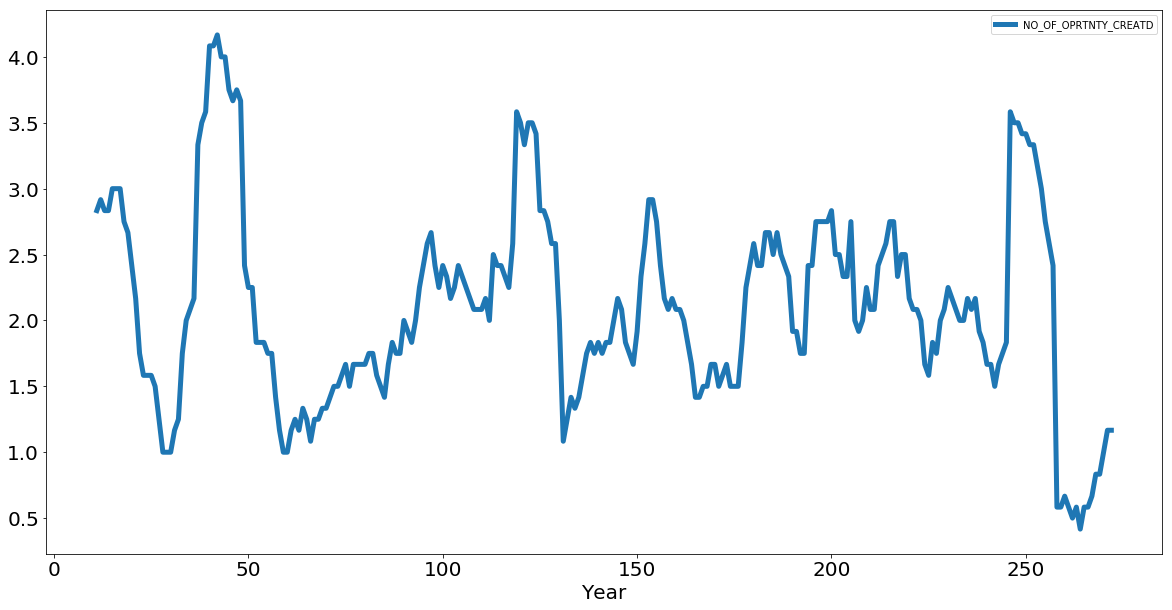

In [105]:
NO_OF_OPRTNTY_CREATD = df2[['NO_OF_OPRTNTY_CREATD']]
NO_OF_OPRTNTY_CREATD.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

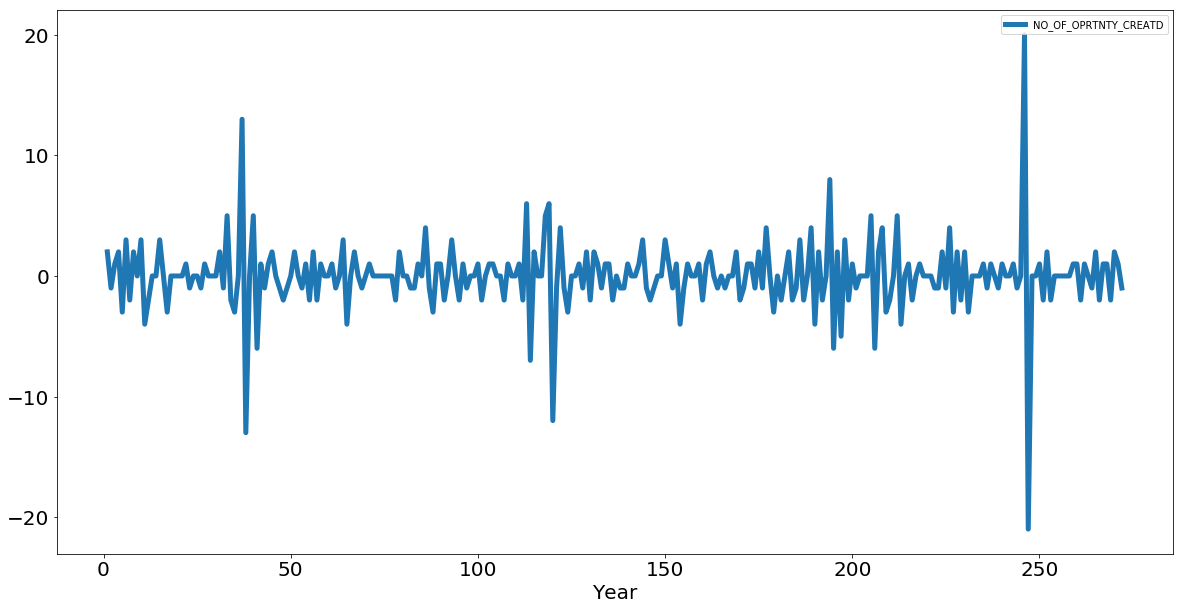

In [106]:
#removing trends for seasonality

NO_OF_OPRTNTY_CREATD.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

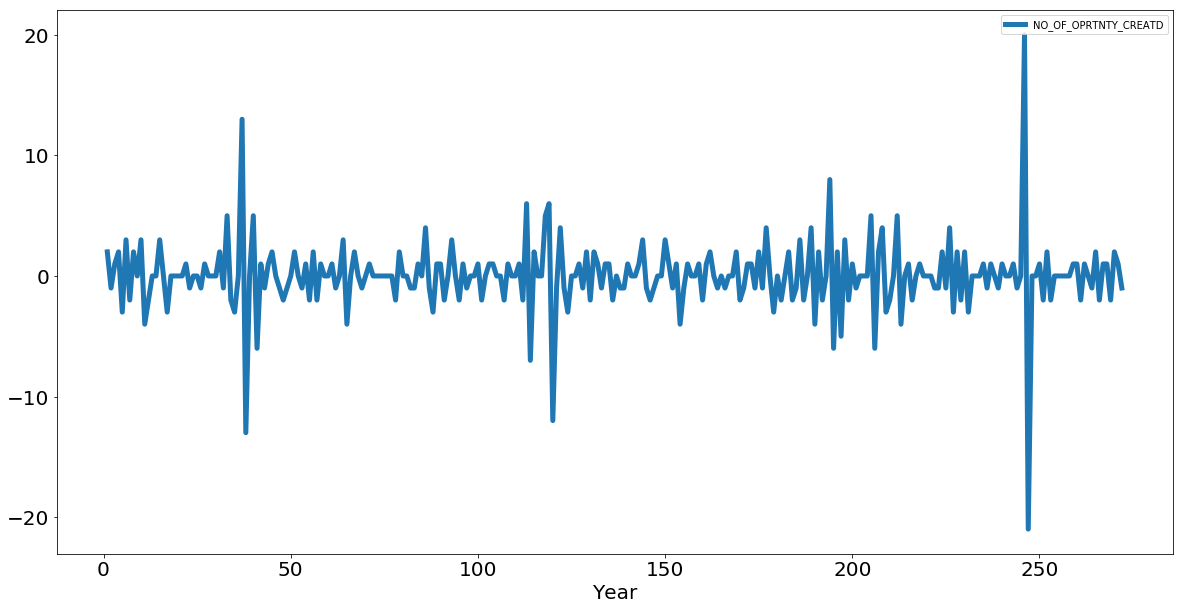

In [107]:
#after removing trends
NO_OF_OPRTNTY_CREATD.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [108]:
NO_OF_OPRTNTY_CREATD.diff().corr()

,NO_OF_OPRTNTY_CREATD
NO_OF_OPRTNTY_CREATD,1.0


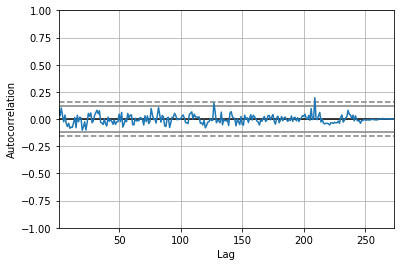

In [110]:
pd.plotting.autocorrelation_plot(	NO_OF_OPRTNTY_CREATD);

In [89]:
#TEST for leads
# Applying Seasonal ARIMA model to forcast the data 
import statsmodels.api as sm
mod = sm.tsa.SARIMAX(df2['NO_OF_OPRTNTY_CREATD'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:               NO_OF_OPRTNTY_CREATD   No. Observations:                  273
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -671.822
Date:                            Wed, 20 Mar 2019   AIC                           1349.645
Time:                                    14:47:14   BIC                           1360.327
Sample:                                         0   HQIC                          1353.939
                                            - 273                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0416      0.096     -0.434      0.665      -0.229       0.146
ma.S.L12      -0.9234      0.080   

In [24]:
four_months_moving_average = indexedData.rolling(window=4).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(four_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('4 Months Moving Average')

NameError: name 'indexedData' is not defined

In [353]:
six_months_moving_average = indexedData.rolling(window=6).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(six_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('6 Months Moving Average')

NameError: name 'indexedData' is not defined

In [354]:
eight_months_moving_average = indexedData.rolling(window=8).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(eight_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('8 Months Moving Average')

NameError: name 'indexedData' is not defined

In [355]:
twelve_months_moving_average = indexedData.rolling(window=12).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(twelve_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('12 Months Moving Average')

NameError: name 'indexedData' is not defined

In [49]:
# TRIAL 2

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 272
Data columns (total 2 columns):
DATE                    273 non-null datetime64[ns]
NO_OF_OPRTNTY_CREATD    273 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


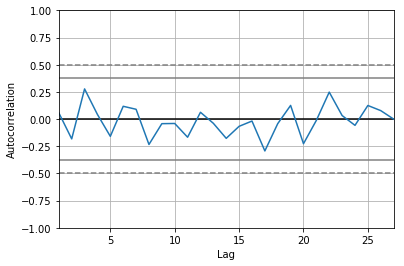

In [111]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(data)
plt.show()

In [112]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(data ,order=(0,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARMA Fit Residual Error Line Plot')
plt.show()

residuals.plot(kind='kde')
plt.title('ARMA Fit Residual Error Density Plot')
plt.show()
print(residuals.describe())

                               ARIMA Model Results                                
Dep. Variable:     D.NO_OF_OPRTNTY_CREATD   No. Observations:                   26
Model:                     ARIMA(0, 1, 0)   Log Likelihood                -105.549
Method:                               css   S.D. of innovations             14.022
Date:                    Wed, 20 Mar 2019   AIC                            215.098
Time:                            14:50:32   BIC                            217.614
Sample:                        01-31-2017   HQIC                           215.823
                             - 02-28-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3846      2.750      0.140      0.890      -5.005       5.774


/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [113]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
X = data.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
x=mean_absolute_percentage_error(yhat, obs)
print(x)

# plot
plt.plot(test, label='actual value')
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.xlabel('MONTHS')
plt.show()








predicted=32.106277, expected=32.000000
predicted=23.715505, expected=23.000000
predicted=26.918689, expected=26.000000
predicted=32.844596, expected=22.000000
predicted=27.307650, expected=7.000000
predicted=31.449555, expected=14.000000
predicted=24.191184, expected=31.000000
predicted=20.755394, expected=7.000000
predicted=16.292208, expected=10.000000
Test MSE: 123.447


NameError: name 'mean_absolute_percentage_error' is not defined

In [67]:
pred = model_fit.get_prediction(start=2018, dynamic=False)
pred_uc = model_fit.get_forecast(steps=50)
pred_uc.predicted_mean.plot(label='Forecast')

AttributeError: 'ARIMAResults' object has no attribute 'get_forecast'

In [65]:
pred_uc = model_fit.get_forecast(steps=3)
prediction = pred_uc.predicted_mean
prediction

273    2.391915
274    2.495847
275    1.976476
dtype: float64

In [33]:
pred = model_fit.get_prediction(start=2018-12, dynamic=False)
pred_uc = model_fit.get_forecast(steps=3)
prediction = pred_uc.predicted_mean

AttributeError: 'ARIMAResults' object has no attribute 'get_prediction'

In [2]:
pred_uc.predicted_mean

NameError: name 'pred_uc' is not defined

In [385]:
prediction

273    2.391915
274    2.495847
275    1.976476
276    1.804650
277    2.148331
278    2.038545
279    1.995008
280    2.119998
281    1.329870
282    2.986794
283    1.584366
284    2.042201
285    2.334718
286    2.475887
287    1.978099
288    1.771858
289    2.184368
290    1.996033
291    1.995861
292    2.157212
dtype: float64

In [111]:
 from sklearn.metrics import r2_score
 r2_score(obs, yhat)

0.0

In [110]:
r2_score

<function sklearn.metrics.regression.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')>

In [362]:
accuracy(yhat,obs)

NameError: name 'accuracy' is not defined

In [73]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
#from sklearn.metrics import MeanSquaredError

#get data
def GetData(fileName):
    return read_csv(fileName, header=0, parse_dates=[0], index_col=0).values

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, p, d, q):
	model = ARIMA(Actual, order=(p, d, q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction
    
#Get exchange rates
ActualData = GetData('Data1.csv')
#Size of exchange rates
NumberOfElements = len(ActualData)

#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]

#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()


#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
	ActualValue =  TestData[timepoint]
	#forcast value
	Prediction = StartARIMAForecasting(Actual, 3,1,0)    
	print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
	#add it in the list
	Predictions.append(Prediction)
	Actual.append(ActualValue)

#Print MSE to see how good the model is
Error = MeanSquaredError(TestData, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
# plot
pyplot.plot(TestData)
pyplot.plot(Predictions, color='red')
pyplot.show()

TypeError: unsupported operand type(s) for -: 'str' and 'int'